
 <div class="alert alert-block alert-info" style="margin-top: 20px">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
<strong>    
    تسک ورودی سامر کمپ تحلیل داده دیوار
    </strong>
    <br><br>زینب محمدتبار
    <br>تابستان وبهار 1400<br>
</div>
<a href="https://github.com/mtzynb">گیت هاب من</a> - <a href="https://www.linkedin.com/in/zeynab-mohammadtabar/">صفحه لینکدین من </a>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px;direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
<strong>فهرست مطالب</strong>
    <p></p>
<li><a href="#ref4">نصب کتابخانه های پایتون</a></li>
    <p></p> 
<li><a href="#ref0">سوال یک</a></li>
<li><a href="#ref1">سوال دو</a></li>
<li><a href="#ref2">سوال سه</a></li>
<li><a href="#ref3">سوال چهار</a></li>
<br>
</div>

<a id="ref4"></a>
### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نصب کتابخانه های پایتون</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای اجرای این نوت بوک نیاز به نصب پکیج های زیر است: <br>
pip install numpy<br>
pip install pandas<br>
pip install matplotlib <br>
pip install openpyxl<br>
pip install scipy<br>
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">همچنین دیتای تسک بدون تغییر نام و به صورت خام در مسیر نوت بوک قرار دارد.
</div>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import binom
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_excel('Summer Camp Task Data.xlsx')

<a id="ref0"></a>
## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> سوال یک</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
با توجه به اینکه دیتای مساله، دیتای جمع آوری شده توسط انسان و بصورت دستی نیست، بلکه دیتا از ذخیره خروجی سرویس جستجوی آگهی اپلیکیشن دیوار جمع آوری شده است، به همین دلیل خطاهایی ک ممکن است در دیتا رخ دهند بدلیل خطای فنی رخ خواهند داد، خطاهایی از قبیل باگ در سرویس، خطای ذخیره سازی در دیتابیس و...<br/>
مواردی که توسط گشت و گذار در دیتا توانستم کشف کنم از قرار زیر هستند:<br/>
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">1.	وجود مقدار #Name?  درفایل اکسل در دو ستون device_id و post_token <br/>

</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma"> 
2.	Null بودن منطقی ستون های post_token و post_index_in_post_list برای اکشن click_post <br/>
و همچنین Null  بودن منطقی ستون های post_page_offset و tokens برای اکشن load_post_page <br/>

</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
3.	وجود کوئری هایی که فقط برای اکشن click_post دیتا دارند و یا بعبارتی دیگر، وجود کوئری هایی که برای اکشن load_post_page دیتایی ندارند ولی برای اکشن click_post دیتا دارند.<br/>
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
4.	برای خوانایی و فهم بهتر زمان رخداد کوئری ها، من ستون created_at را به فرمت date تبدیل کردم و با بررسی هایم بنظر مشکلی در ذخیره سازی و دیتاهای این ستون موجود نیست، هم چنین بدلیل تغییر فرمت این ستون به date تایپ ستون را نیز از int64 به dateTime64 تبدیل کردم. <br/>
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">5.	وجود رکورد تکراری<br/>
بررسی تکراری بودن براساس درنظر گرفتن تساوی مقادیر تمام ستون ها انجام شده است.<br/> 
رویکرد رفع خطا: نگه داشتن اولین رکورد از مجموعه رکوردهای تکراری و حذف بقیه رکودهای تکراری
<br/>
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma"> <br/>
بررسی دقیق تر هر خطا و رویکرد رفع خطا:
</div>

## <div style="direction:rtl;text-align:right;font-family:Tahoma">1.	وجود مقدار #Name?  درفایل اکسل در دو ستون device_id و post_token 
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">نحوه برخورد من با این خطا:<br/>
برخورد با ستون device_id : حذف کامل ستون device_id <br/>
دلیل: <br/>
با توجه به مساله در حال حاضر من نیازی به استفاده از ستون device_id ندارم، تمام اطلاعات مورد نیازم توسط ستون source_event_id (شناسه کوئری کاربر) قابل دسترسی است. به همین دلیل صلاح دانستم ک ستون device_id را کلا حذف کنم و درگیر پرکردن مقادیر miss  شده یا مقادیر اشتباه نشوم.<br/>
</div>

In [4]:
df[df['device_id'].isnull()].sort_values(by= 'device_id', ascending=False) #the filter shows the NaN in 'device_id' column

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token
30,load_post_page,1609544643099,1f7d05a1-a65d-40d5-b0c7-8aa7c9904052,NaN,30.0,"[wXqHuuPP, wXqD-7ES, wXq_dCXM, wXqvtwYd, wXqTN...",NaN,NaN
49,load_post_page,1609547132858,b3c190ef-94c0-4983-ac18-6fea54a89b22,NaN,0.0,"[wXvnV_cv, wXv3VGI6, wXvP2oHU, wXv_ji--, wXvb3...",NaN,NaN
59,load_post_page,1609545616418,9895efc1-5018-4312-b344-a7ce57d73c9b,NaN,0.0,"[wXvj6lih, wXvHaMTh, wXvT6QAp, wXvTKwbr, wXvPK...",NaN,NaN
168,load_post_page,1609546115541,9895efc1-5018-4312-b344-a7ce57d73c9b,NaN,5.0,"[wXvPmynJ, wXvXWgFe, wXvXGZ-z, wXvb2dC4, wXvLW...",NaN,NaN
211,load_post_page,1609545205750,a131cdc3-1de0-4f6b-bb43-cfbaec1d6272,NaN,2.0,"[wXbXjnLg, wXvLZHEH, wXkLftaE, wXvHphwq, wXvnY...",NaN,NaN
...,...,...,...,...,...,...,...,...
110903,load_post_page,1609544165276,8c31bde9-2cf9-4a52-a392-abdcbb6d2e38,NaN,1.0,"[wXuLhfrc, wXuvAZoi, wXufwwop, wXtPft6L, wXtve...",NaN,NaN
110918,load_post_page,1609545868130,f8bbe370-a066-46d3-9891-9c1d218732b6,NaN,0.0,"[wXrrT5Q9, wXnb4Y0O, wXnrwX-B, wXULpDs5, wXUDn...",NaN,NaN
110922,load_post_page,1609545872649,9895efc1-5018-4312-b344-a7ce57d73c9b,NaN,3.0,"[wXv71AfE, wXv_VXVu, wXvz3W7_, wXvvX3eR, wXvrH...",NaN,NaN
111027,load_post_page,1609545135547,dcd281cc-d83e-4702-ab0e-949b5cac6784,NaN,0.0,"[wXvnqHJS, wXtv332G, wXv_W3xF, wXCrDN8h, wXvvA...",NaN,NaN


In [5]:
print("Before Deleteing 'device_id' column -- df Size is: ", df.shape)
#--------------------------------------------------------
df.drop(columns=['device_id'], inplace= True) # drop the device_id column
#--------------------------------------------------------
print("After Delete 'device_id' column -- df Size is: ", df.shape)

Before Deleteing 'device_id' column -- df Size is:  (111083, 8)
After Delete 'device_id' column -- df Size is:  (111083, 7)


<div style="direction:rtl;text-align:right;font-family:Tahoma">
برخورد با ستون post_token :<br/>
یکی از موارد کریتیکال در اکشن click_post ، استخراج شناسه آگهی کلیک شده و ذخیره آن در ستون post_token است. پس حتما تمام اکشن های click_post باید در ستون post_token مقدار valid داشته باشند. <br/>
با بررسی انجام شده من یک رکورد برای اکشن click_post یافتم که شناسه آگهی (post_token) برای آن بصورت #Name? ذخیره شده است.<br/>
احتمالا در سیستم خطایی رخ داده است که پس از کلیک کاربر بر آگهی، شناسه آگهی به درستی ذخیره نشده است،<br/>
</div>

In [6]:
df[(df['action']== 'click_post') & (df['post_token'].isnull()) ]
#u can see there is only one record with the applied condition

,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
41205,click_post,1609546383761,7ef56e51-cdb6-40dc-9615-61f6e9c54fd1,NaN,NaN,22.0,NaN


<div style="direction:rtl;text-align:right;font-family:Tahoma">
 من دو رویکرد برای رفع این خطا در نظر گرفته ام: <br/>
•	حذف آگهی های مربوط به کوئری هایی که شناسه آگهی (post_token) آنها به اشتباه ذخیره شده است.<br/>
•	پر کردن مقادیر اشتباه ستون post_token با مقداری تقریبی که از محاسبه 2 ستون post_index_in_post_list و ستون tokens میتوان بدست آورد.<br/><br/>
هر دو رویکرد منطقی و درست هستند، اما با توجه به اینکه این خطا تنها برای یک مورد از کل دیتاهای موجود رخ داده است من تصمیم گرفتم تا رویکرد اول، حذف کوئری، را عملیاتی کنم. <br/>
</div>

In [7]:
print("Records related to the '7ef56e51-cdb6-40dc-9615-61f6e9c54fd1' is going to be dropped from the original dataset")
print('Before Delete df Size is: ', df.shape)
#--------------------------------------------------------
df.drop(df[df['source_event_id'] == '7ef56e51-cdb6-40dc-9615-61f6e9c54fd1'].index, inplace= True) 
#--------------------------------------------------------
print('After Delete df Size is: ', df.shape)

Records related to the '7ef56e51-cdb6-40dc-9615-61f6e9c54fd1' is going to be dropped from the original dataset
Before Delete df Size is:  (111083, 7)
After Delete df Size is:  (111077, 7)


<div style="direction:rtl;text-align:right;font-family:Tahoma">
دلیل: <br/>
با توجه به اینکه به اندازه کافی دیتا برای حل مساله موجود است و با حذف تنها یک رکورد اتفاق خیلی بدی برای محاسبات ایجاد نخواهد شد من تصمیم بر حذف گرفتم. اما اگر خطای رخ داده دیتاهای زیادی را تحت تاثیر قرار داده بود حتما رویکرد دوم باید انجام شود و دیتاهای miss شده به روشی پر شوند. <br/>
</div>

## <div style="direction:rtl;text-align:right;font-family:Tahoma">2.	Null بودن ستون های post_token و post_index_in_post_list برای اکشن click_post و همچنینNull  بودن ستون های post_page_offset و tokens برای اکشن load_post_page 
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نحوه برخورد من با این مورد:<br/>
با توجه به بیزینس دو ستون post_token و post_index_in_post_list فقط برای اکشن click_post <br/>
و دو ستون post_page_offset و tokens فقط برای اکشن load_post_page <br/>
باید دارای value باشند ولی چون در فایل csv دیتاست این مقادیر نال ذخیره شده اند، وقتی دیتا را در پایتون load میکنیم مقدار آنها NaN میشود. نال بودن این مقادیر کاملا درست است ولی برای کار کردن با دیتا و جلوگیری از خطاهای محاسباتی آینده باید تا حد امکان دیتاها را از مقادیر NaN  نجات داد. به همین دلیل من تصمیم گرفتم که به تفکیک اکشن ها مقادیر NaN شان را از قرار زیر مقدار دهی کنم: <br/>
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
اکشن click_post :<br/>
مقادیر NaN ستون post_index_in_post_list با عدد صفر پر شوند<br/>
و<br/>
 مقادیر NaN ستون post_token با رشته zzzzzzzz پر شوند. (دلیل: تمام مقادیر ستون post_token رشته های به طول 8 هستند، من هم از رشته ای به طول 8 که در کل دیتاست موجود نیست برای پرکردن نال های منطقی این ستون استفاده کردم. ) <br/>

</div>

In [8]:
#fill NaN in 'post_index_in_post_list' with zero
df['post_index_in_post_list'] = df['post_index_in_post_list'].fillna(0)
#--------------------------------------------------------
#fill NaN in 'post_token' with 'zzzzzz'
df['post_token'] = df['post_token'].replace(np.nan, 'zzzzzzzz')


<div style="direction:rtl;text-align:right;font-family:Tahoma">
همچنین برای اکشن load_post_page:<br/>
مقادیر NaN ستون post_page_offset با عدد صفر پر شوند<br/>
و<br/>
مقادیر NaN ستون tokens با رشته [] پر شوند.<br/>

</div>

In [9]:
#fill NaN in 'post_page_offset' with zero
df['post_page_offset'] = df['post_page_offset'].fillna(0)
#--------------------------------------------------------
#fill NaN in 'tokens' with '[]'
df['tokens'] = df['tokens'].replace(np.nan, '[]')

## <div style="direction:rtl;text-align:right;font-family:Tahoma"> 3.	وجود کوئری هایی بدون داشتن دیتا برای اکشن load_post_page
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
مورد دیگری که قابل اشاره است این است که من کشف کردم که تمام دسته های 24 تایی آگهی ها، که کاربر load کرده است، به طور کامل ذخیره نشده اند، برای مثال اگر کاربر 161 دسته 24 تایی از آگهی ها را laod کرده باشد ما باید 161 رکورد برای اکشن load_post_page داشته باشیم ولی با بررسی انجام شده 161 رکورد موجود نیست بلکه برای اکشن load_post_page فقط از دسته 138 تا 161 در دیتاست ذخیره شده اند. <br/> 
نکته ای دیگر که با بررسی هر کوئری متوجه شدم این است که، کوئری هایی وجود دارند که برای اکشن load_post_page هیچ دیتایی ندارند و فقط برای اکشن click_post دیتا دارند، بنظر من نباید چنین موردی در دیتا دیده میشد چون اصلا منطقی نیست که برای یک کوئری فقط دیتای click_post داشته باشیم :/ <br/>
برای مورد اول مطمین نیستم که خطای دیتا باشد، ممکن است به دلیل لاجیک سرویس ذخیره سازی دیتاها این مورد بوجود آمده باشد، که دیوار سرویس ها را طوری برنامه نویسی کرده است که اگر کاربر با یک کوئری، آگهی های زیادی را load کرده باشد ولی فقط از دسته های آخر روی آگهی ها کلیلک کرده باشد، نیازی به ذخیره تاریخچه دسته های بالایی آگهی ها نباشد. ولی برای مورد دوم هیچ دلیلی نمیتوانم بیابم که چرا اینطوری شده است. <br/>
حتی ممکن است که دیتایی که در اختیار ما قرار داده اید نصفه باشد که موارد این چنینی رخ داده است که اگر این مورد صحت داشته باشد خطای شدیدی در آنالیزها خواهیم داشت.<br/>
حتی ممکن است این موارد، واقعا جز خطا ها ی دیتا باشد که نیاز به بررسی و اصلاح دارند. <br/>
به هرحال ذکر این نکات به نظرم خالی از لطف نبود : ) <br/>
من برای مورد دوم، که بعضی از کوئری ها فقط دیتای click_post دارند رویکردی را عملیاتی کرده ام:<br/>
رویکرد: حذف تمام کوئری هایی که فقط برای اکشن click_post دیتا دارند. <br/>
در زیر مراحل شناسایی و حذف این رکوردها را داریم: 

</div>

In [10]:
uniq_quaries = pd.unique(df['source_event_id']) #get all the unique 'source_event_id' s
print(len(uniq_quaries))

14295


<div style="direction:rtl;text-align:right;font-family:Tahoma">قطعه کد زیر  برای شناسایی کوئری هایی است که برای اکشن click_post دیتا دارند ولی دیتای اکشن load_post_page برای آنها ذخیره نشده است.
</div>

In [11]:
all_wrong_data = pd.DataFrame(columns=df.columns)
#--------------------------------------------------------
for i in uniq_quaries:
    
    df2 = df[df['source_event_id'] == i]
    
    if len(df2[df2['action'] == 'load_post_page']) <1 : #it means the query doesn't have any load_post_page record
        all_wrong_data = all_wrong_data.append(df2, ignore_index=True)

#--------------------------------------------------------
print('all_wrong_data size: ', all_wrong_data.shape)
all_wrong_data

all_wrong_data size:  (33547, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,click_post,1609545002418,be60130c-a660-4e23-954d-9bcf08377b24,0.0,[],3.0,wXq3yGW3
1,click_post,1609545051381,be60130c-a660-4e23-954d-9bcf08377b24,0.0,[],8.0,wXVOFPOG
2,click_post,1609544901751,be60130c-a660-4e23-954d-9bcf08377b24,0.0,[],20.0,wXq0p8wv
3,click_post,1609544940434,be60130c-a660-4e23-954d-9bcf08377b24,0.0,[],25.0,wXak8GT7
4,click_post,1609544992110,be60130c-a660-4e23-954d-9bcf08377b24,0.0,[],6.0,wXVOaBpu
...,...,...,...,...,...,...,...
33542,click_post,1609544009080,59e9cb45-83f0-459c-b832-0e6aa1d8f3a9,0.0,[],3.0,wXknJP4w
33543,click_post,1609545496079,b39ca866-3fb3-42d5-834f-7ffbbb6ce822,0.0,[],9.0,wXBSsT6X
33544,click_post,1609545426907,aafa83da-0469-4369-90aa-48c2b5235eb8,0.0,[],4.0,wXuvOfQk
33545,click_post,1609544302510,76661345-160b-4111-9f10-076296157846,0.0,[],2.0,wXvL48nG


<div style="direction:rtl;text-align:right;font-family:Tahoma">قطعه کد زیر نیز حذف این دیتاها را انجام میدهد.(قابل ذکر است که بدون اجرای قطعه کد بالا و فقط با اجرای کد زیر این موارد به راحتی حذف خواهند شد، قطعه کد بالا صرفا جهت نشان دادن و اثبات وجود کوئری های مشکل دار است.)
<div/>

In [12]:
print("Before deleteing -- Original df Row size is: ", df.shape)
#--------------------------------------------------------
for i in uniq_quaries:
    
    df2 = df[df['source_event_id'] == i]
    
    if len(df2[df2['action'] == 'load_post_page']) <1 : #it means the query doesn't have any load_post_page record
        df.drop(df2.index, inplace=True)
#--------------------------------------------------------
print("After deleteing --Now Original df Row size is: ", df.shape)
df

Before deleteing -- Original df Row size is:  (111077, 7)
After deleteing --Now Original df Row size is:  (77530, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,1609545001150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,1609545121641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,1609545009147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,1609546776979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,1609547182717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
111078,load_post_page,1609546941659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
111079,load_post_page,1609547257051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
111080,load_post_page,1609546292003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
111081,load_post_page,1609546304942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


 ## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">4.	تغییر تایپ ستون created_at از int64  به dateTime64
<div/>

In [13]:
df.info() # as u can see 'created_at' is int64 dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77530 entries, 0 to 111082
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   action                   77530 non-null  object 
 1   created_at               77530 non-null  int64  
 2   source_event_id          77530 non-null  object 
 3   post_page_offset         77530 non-null  float64
 4   tokens                   77530 non-null  object 
 5   post_index_in_post_list  77530 non-null  float64
 6   post_token               77530 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.7+ MB


In [14]:
df['created_at'] = df['created_at'].values.astype(dtype='datetime64[ms]') # change 'created_at' dtype to datetime64
#--------------------------------------------------------
df.info()
df # u can see the created_at column is changed 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77530 entries, 0 to 111082
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   action                   77530 non-null  object        
 1   created_at               77530 non-null  datetime64[ns]
 2   source_event_id          77530 non-null  object        
 3   post_page_offset         77530 non-null  float64       
 4   tokens                   77530 non-null  object        
 5   post_index_in_post_list  77530 non-null  float64       
 6   post_token               77530 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 4.7+ MB


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
111078,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
111079,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
111080,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
111081,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


## <div style="direction:rtl;text-align:right;font-family:Tahoma">5.	شناسایی رکودهای تکراری و حذف آنها
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
بررسی تکراری بودن براساس درنظر گرفتن تساوی مقادیر تمام ستون ها انجام شده است.<br/> 
رویکرد رفع خطا: نگه داشتن اولین رکورد از مجموعه رکوردهای تکراری و حذف بقیه رکودهای تکراری
<br/>
</div>

In [15]:
duplicate_values = df[df.duplicated(keep='first')] # it shows the duplicated records, we need to delete them all
#--------------------------------------------------------
print("Duplicate Values Number : ", len(duplicate_values))
duplicate_values


Duplicate Values Number :  48


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
27138,click_post,2021-01-01 23:54:03.043,34a80c15-0f80-4f76-8cae-e56f8067caa6,0.0,[],43.0,wXvL0FwX
40516,click_post,2021-01-01 23:33:56.353,262d876a-cf53-43f9-a4d1-ca17b94a1509,0.0,[],97.0,wXpbu49a
42379,click_post,2021-01-02 00:00:53.959,c47f5518-8170-4f28-ba34-d03c62746584,0.0,[],2.0,wXM7JIPY
43043,click_post,2021-01-02 00:04:31.106,2794b5f5-304d-4fe2-93c4-c445a0e4eb91,0.0,[],12.0,wXqPlcdB
43613,click_post,2021-01-02 00:08:03.082,30eb870a-491f-42af-b3ce-9dbe9bfa86b5,0.0,[],4.0,wXvjA7LV
60939,click_post,2021-01-01 23:50:59.495,31d33e58-c6f5-4a9a-b303-a29eb8114025,0.0,[],83.0,wXiPhRES
61807,click_post,2021-01-02 00:20:27.901,92c4c115-e883-40f0-82c5-32e4e5601856,0.0,[],168.0,wXkXxelF
62658,load_post_page,2021-01-02 00:27:40.645,005d3801-cbd8-4432-be02-3b85c10f6938,0.0,[wXg7l0c1],0.0,zzzzzzzz
63782,load_post_page,2021-01-01 23:30:19.447,9fa7970d-172d-4568-bee1-14d05ad2d945,0.0,"[wXvLmMoH, wXv7FaPA, wXvvSWqB, wXl6CJBU, wXl6S...",0.0,zzzzzzzz
63929,load_post_page,2021-01-02 00:11:06.023,77f40a07-e8fc-413f-ad33-8ba496006188,7.0,"[wXurChyX, wXuvi3ID, wXurC8Zs, wXufSVGX, wXufC...",0.0,zzzzzzzz


In [16]:
print("Before deleteing Duplicate Values -- Original df size is: ", df.shape)
#--------------------------------------------------------
df.drop_duplicates(inplace=True) # delet all duplicated data 
#--------------------------------------------------------
print("After deleteing Duplicate Values -- Original df size is: ", df.shape)
df

Before deleteing Duplicate Values -- Original df size is:  (77530, 7)
After deleteing Duplicate Values -- Original df size is:  (77482, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
111078,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
111079,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
111080,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
111081,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


In [17]:
df.shape

(77482, 7)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در نهایت پس از انجام پیش پردازش ها تعداد کل داده ها از 111083 به 77482 کاهش یافت. <br/>
تعداد ستون ها نیز از 8 ستون به 7 ستون کاهش یافت. <br/>برای آنالیزهای آینده نیاز است که آنالیزها بر روی دیتای پیش پردازش شده انجام شوند به همین دلیل من دیتا پیش پردازش شده را به فرمت زیر ذخیره میکنم تا در استفاده های آینده بتوان به راحتی به دیتای پیش پردازش شده دسترسی پیدا یافت.
</div>

In [18]:
df.reset_index(drop=True, inplace=True)
#--------------------------------------------------------
df.to_pickle('Divar_PreProcessd_Task_Data.pkl')

<a id="ref1"></a>
## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> سوال دو</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">با توجه به سوال 1 که 5 مرحله پیش پردازش بر روی دیتای داده شده، انجام شد، دیتای پیش پردازش شده را به فرمت pk1 برای استفاده های آینده ذخیره کردم.<br/>
متریک های درخواستی نیز بر روی دیتای پیش پردازش شده محاسبه خواهند شد، برای load کردن دیتای پیش پردازش شده می توان از دستور زیر استفاده کرد.
<div/>

In [2]:
df = pd.read_pickle('Divar_PreProcessd_Task_Data.pkl') 
print(df.shape)
df

(77482, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
77477,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
77478,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
77479,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
77480,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">محاسبه متریک dark query percent :
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برای محاسبه متریک dark query percent مراحل زیر به ترتیب انجام شده است:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">1-	جداسازی کل داده های اکشن load_post_page از کل داده های موجود<br/>
ابتدا تمام داده های مربوط به اکشن load_post_page توسط فیلتر زیر از کل داده ها جدا سازی شد تا بقیه مراحل نیز بر روی این داده ی فیلتر شده انجام شوند.
<div/>

In [3]:
load_post_page_data = df[df['action'] == 'load_post_page']
load_post_page_data.reset_index(drop=True,inplace=True)
#--------------------------------------------------------
print("load_post_page_data size is: ", load_post_page_data.shape)
load_post_page_data

load_post_page_data size is:  (35263, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
35258,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
35259,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
35260,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
35261,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
2-	بدست آوردن تعداد آگهی هایی که در هر بار اکشن load_post_page توسط کاربر نمایش داده شده اند. <br/>
برای این عمل ابتدا نیاز است که داده های ستون tokens که به صورت رشته ذخیره شده اند را تبدیل به لیستی از token ها  کنیم و سپس سایز هر لیست به دست آمده را در لیستی با نام number_of_tokens ذخیره کنیم. مطابق زیر:
<div/>

In [4]:
number_of_tokens = []
#--------------------------------------------------------
for i in load_post_page_data['tokens']:
    list_of_tokens = i.strip('][').split(', ')
    number_of_tokens.append(len(list_of_tokens))
#--------------------------------------------------------
print("number_of_tokens len is :" ,len(number_of_tokens))

number_of_tokens len is : 35263


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">3-	اضافه کردن ستون number_of_tokens به داده های بدست آمده در مرحله 1<br/>
حال میتوان لیست به دست آمده در مرحله قبل (number_of_tokens) را به دیتای بدست آمده در مرحله 1 اضافه کرد، با این عمل یک دیتا فریم کامل، از تمام اکشن های load_post_page خواهیم داشت  که این بار تعداد آگهی های load شده مربوط به هر اکشن نیز برای آنها محاسبه شده است و در ستون number_of_tokens اضافه شده اند. 
<div/>

In [5]:
print("load_post_page_data old shape is : ",load_post_page_data.shape)
#--------------------------------------------------------
load_post_page_data.insert(7, "number_of_tokens", number_of_tokens, True)
#--------------------------------------------------------
print("'number_of_tokens' column inserted to the end of the columns")
print("load_post_page_data new shape is : ",load_post_page_data.shape)
load_post_page_data

load_post_page_data old shape is :  (35263, 7)
'number_of_tokens' column inserted to the end of the columns
load_post_page_data new shape is :  (35263, 8)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token,number_of_tokens
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz,24
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz,24
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz,24
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz,24
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz,24
...,...,...,...,...,...,...,...,...
35258,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz,24
35259,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz,13
35260,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz,24
35261,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz,24


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">4-	بدست آوردن تعداد کوئری هایی که برای آنها کمتر از 10 آگهی نمایش داده شده است. <br/>
این کار توسط یک دستور groupby براساس source_evenet_id ها و اعمال شرط sum()< 10 قابل انجام است. مطابق زیر:
<div/>

In [6]:
sum_of_all_ads_in_each_query = load_post_page_data.groupby('source_event_id')[['number_of_tokens']].sum() <10
a = sum_of_all_ads_in_each_query.loc[sum_of_all_ads_in_each_query.values==True]
#--------------------------------------------------------
number_of_ads_less_than_ten_in_each_query = len(a)
print("number of ads in each query that are less than 10 :", number_of_ads_less_than_ten_in_each_query)

number of ads in each query that are less than 10 : 1138


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
5-	با داشتن تعداد کوئری های مرحله 4 و همچنین تعداد کل کوئری های موجود درصد متریک مورد نظر از قرار زیر محاسبه میشود:
<div/>

In [7]:
number_of_all_the_queries = len(df.groupby('source_event_id')) #9380
print(number_of_all_the_queries)

9380


In [8]:
dark_query_percent = (number_of_ads_less_than_ten_in_each_query / number_of_all_the_queries) * 100
#--------------------------------------------------------
print("dark query percent for this data is : " , dark_query_percent)

dark query percent for this data is :  12.132196162046908


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">محاسبه متریک query bounce rate :
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">(نیاز به اشاره است که از دیتای پیش پردازش شده در سوال یک، برای محاسبه این متریک نیز استفاده شده است.)
<div/>

In [2]:
df = pd.read_pickle('Divar_PreProcessd_Task_Data.pkl')
print(df.shape)
df

(77482, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
77477,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
77478,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
77479,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
77480,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
بدلیل اینکه در سوال یک در مرحله سوم از پیش پردازش داده، تمام کوئری هایی که برای اکشن load_post_page دیتا نداشتند، حذف شدند، به همین دلیل با خیال آسوده میتوان اعلام کرد که پس از انجام پیش پردازش، تنها 2 حالت برای کوئری های موجود داریم:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">1-	کوئری هایی که برای آنها اکشن click_post ای ذخیره نشده است.<br/>
2-	کوئری هایی که برای آنها هر دو اکشن load_post_page و click_post ذخیره شده است. 
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برای محاسبه متریک query bounce rate که در واقع داده های حالت 1 را شامل میشود، مراحل زیر انجام شده است:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">1-	جداسازی کل داده های اکشن click_post از کل داده های موجود
<div/>

In [3]:
click_post_data = df[df['action'] == 'click_post']
click_post_data.reset_index(drop=True,inplace=True)
#--------------------------------------------------------
print("click_post_data size is: ", click_post_data.shape)
click_post_data

click_post_data size is:  (42219, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,click_post,2021-01-01 23:47:59.533,461e9683-e679-4448-bee3-d0b07353ab5d,0.0,[],6.0,wXv7xXEj
1,click_post,2021-01-01 23:53:14.137,bae194e5-2628-4650-b755-0f2847a5a908,0.0,[],1126.0,wXvrU7oz
2,click_post,2021-01-01 23:52:46.685,f5cd543e-8db1-4222-9620-12173db6da47,0.0,[],5.0,wXuLP3Ls
3,click_post,2021-01-01 23:40:58.300,08a23473-f570-4e6b-b070-ab2159dd925e,0.0,[],172.0,wXu_PZYL
4,click_post,2021-01-01 23:55:55.564,dc7324c4-4382-4f12-bc70-6a0a7bdbc64d,0.0,[],123.0,wXobfkhw
...,...,...,...,...,...,...,...
42214,click_post,2021-01-01 23:57:12.461,c378ba04-6e34-450f-91ee-ee69e3059340,0.0,[],9.0,wXmTQKw1
42215,click_post,2021-01-01 23:53:19.893,5d4fd83c-493e-4f69-9949-7346a920631b,0.0,[],94.0,wXvnlWej
42216,click_post,2021-01-01 23:48:25.003,f000d17c-85ac-401f-891c-70bce61e8b5d,0.0,[],21.0,wXLfZtO6
42217,click_post,2021-01-01 23:54:44.069,8ed483b6-649f-4ba9-9be7-e969c338bf56,0.0,[],201.0,wXvDYi_h


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">2-	استخراج لسیتی از کوئری های یکتا که اکشن click_post حداقل یکبار برای آنها رخ داده است.<br/>
برای این عمل از دستور unique بر روی ستون source_evenet_id ی دیتای مرحله قبل استفاده شده است.
<div/>

In [4]:
uniq_quaries_for_click_post = pd.unique(click_post_data['source_event_id'])
print(" uniq_quaries_for_click_post size : ", len(uniq_quaries_for_click_post))
uniq_quaries_for_click_post

 uniq_quaries_for_click_post size :  5904


array(['461e9683-e679-4448-bee3-d0b07353ab5d',
       'bae194e5-2628-4650-b755-0f2847a5a908',
       'f5cd543e-8db1-4222-9620-12173db6da47', ...,
       '89118b1f-2c30-4f44-84aa-8a6df49c98e2',
       '79b758c8-fdfe-4135-9864-b01dbaf7855d',
       '77a62307-b9d4-4d6f-84ee-20e7d3619821'], dtype=object)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">3-	استخراج لسیتی از کوئری ها که هیچ اکشن click_post ای برای آنها ذخیره نشده است. <br/>
کوئری هایی که فقط اکشن load_post_page  دارند = تفاوت کل کوئری های موجود با کوئری هایی که حداقل یک اکشن click_post برای آنها وجود دارد. <br/>
محاسبه این مورد با دستور setdiff در پایتون براحتی انجام میشود:
<div/>

In [5]:
all_uniq_quaries = pd.unique(df['source_event_id'])
print(len(all_uniq_quaries)) # 9380
all_uniq_quaries

9380


array(['1575558c-a702-46ef-8e18-bc5cef761473',
       '0fd004f4-ce9b-4766-ac96-7578dedebacb',
       '479905f2-3bb4-4c90-8e88-5ce4b60d0a73', ...,
       '5baa4fe5-5f0f-47bc-b282-97843db9d155',
       'c3cd486c-ed9c-4f54-8140-bcfd330fe481',
       '9e2634d6-f7bc-4e68-8d77-119bece8141e'], dtype=object)

In [6]:
queries_with_only_load_post_page_action = np.setdiff1d(all_uniq_quaries, uniq_quaries_for_click_post)
print(len(queries_with_only_load_post_page_action)) # 3476
queries_with_only_load_post_page_action

3476


array(['00049ef3-c027-4f55-869c-46711f0ea0ad',
       '00069dda-4175-4bb0-8ef0-c0e1031d4da6',
       '002222cf-9e4b-4432-9e36-ad500a753850', ...,
       'ffd0cb32-0cd6-44d3-ad02-b87b764a47dd',
       'ffeaa17f-ee79-4f42-be58-afd60a5aef37',
       'fffc83a5-3f35-4cfe-bb4d-e1b9bf709860'], dtype=object)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">4-	با داشتن تعداد کوئری های مرحله 3 و تعداد کل کوئری های موجود درصد متریک خواسته شده از قرار زیر بدست می آید:
<div/>

In [7]:
query_bounce_rate = (len(queries_with_only_load_post_page_action) / len(all_uniq_quaries))*100
#--------------------------------------------------------
print("query bounce rate for this data is : " , query_bounce_rate)

query bounce rate for this data is :  37.05756929637526


<a id="ref2"></a>
## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> سوال سه</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">من متریک سوم، میانگین فاصله بین رتبه کلیک‌های یک کاربر، را به 3 متریک دیگر ترجیح میدهم، برای انتخاب نکردن هر کدام از سه متریک دیگر دلایل زیر را دارم:
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
-	رتبه اولین کلیک کاربر: برای این متریک نقطه ضعف بزرگی که میتوان در نظر گرفت، این است که ممکن است کاربر پس از فیلتر آگهی هایش بصورت تصادفی روی یکی از نتایج اشتباها کلیک کرده باشد و این آگهی سهوا کلیک شده میتواند در هر رتبه ای از آگهی های load شده باشد، به همین دلیل استفاده از این متریک به تنهایی اصلا قابل استناد برای تشخیص خوب بودن عملکرد نمایش آگهی های مطابق خواسته کاربر نیست.</br>    
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
-	اینکه آیا روی یکی از ۳ نتیجه اول کوئری کلیک شده یا نه: ایرادی که به متریک قبلی وارد شد به این متریک نیز وارد است،  بعلاوه میتوان اشاره کرد  که چون نتایج کوئری های اپلیکیشن دیوار براساس جدیدترین آگهی های منتشر شده sort میشوند، ضعف بزرگ این مدل sort شدن، این است که برای مثال اگر کاربر به دنبال فیلتر</br>
"آگهی های فروش پژو 206 با سال تولید 92 تا 97" باشد، با توجه به اینکه سال تولید 92 تا 97 مورد نظر کاربر است ولی برای کاربر پژوهای تولید سال 92 اولویت بالاتری دارند. نتیجه ی این کوئری برای کاربر در این مثال به گونه ای sort و اعلام میشود که 3 نتیجه اول، جدیدترین آگهی های منتشر شده در دیوار مربوط به کوئری است که هر 3 آگهی اول، پژوهای 206 سال 97 هستند، برای کاربر دیدن پژو 206 های سال 92 اولویت بالاتری دارند به همین دلیل ممکن است حتی کاربر روی 3 نتیجه اول کوئری کلیک کرده باشد ولی آگهی مدنظرش در رتبه 21 باشد که مربوط به پژو 206 تولید سال 92 است که 2 روز پیش آگهی آن در دیوار منتشر شده است، پس با توجه به نحوه رتبه بندی آگهی های دیوار براساس زمان انتشار، کلیک کردن یا نکردن روی 3 نتیجه اول به تنهایی قابل استناد نیست.
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
-	درصد آگهی‌های کلیک شده نسبت به آگهی‌های لود شده: این متریک برای کیس اپلیکیشن دیوار به نسبت 2 متریک قبلی بهتر است، ولی با توجه به اینکه در این متریک هیچ توجهی به رتبه آگهی های کلیک شده نشده است، به همین دلیل این مورد را میتوان جز ضعف های این متریک برای سنجش عملکرد نمایش نتایج آگهی های مورد نظر کاربر در نظر گرفت.
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
دلیل من از انتخاب متریک "میانگین فاصله بین رتبه کلیک‌های یک کاربر" این است که با استفاده از این متریک به تنهایی، میتوان نتیجه ای تا حد قابل قبولی، قابل اطمینان گرفت. این متریک هر سنجشی که 3 متریک قبلی انجام میدهند را به نحوی در خود دارد، بعلاوه توسط این متریک میتوان تا حدی رفتار واقعی کاربر جستجوگر را شناسایی و بررسی کرد. هم چنین ضعف اصلی که از نظر من بر 3 متریک قبلی وارد است، این است که، کلیک سهوی کاربر روی یک آگهی بصورت چشم گیری روی نتیجه تحلیل های متریک ها اثر گذار است ولی در این متریک با توجه به در نظر گرفتن  تمام کلیک های کاربر و رتبه آنها در نهایت پترن و اطلاعات قابل اعتمادتری بدست می آید. </br>
3 متریک قبلی به تنهایی سنجش مناسبی برای بررسی خوب بودن نمایش آگهی های مطابق خواسته کاربر نیستند، اگر 4 متریک را باهم برای این سنجش مورد تحلیل و بررسی قرار دهیم، در این صورت تحلیل مان با خطای کمتری خواهد بود وگرنه 3 متریک قبل، به تنهایی تحلیل مطمئنی از عملکرد نمایش نتایج آگهی های مرتبط با خواسته کاربر به ما نمیدهند.

</div>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">محاسبه متریک میانگین فاصله بین رتبه کلیک‌های یک کاربر
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">(نیاز به اشاره است که از دیتای پیش پردازش شده در سوال یک، برای محاسبه این متریک نیز استفاده شده است.)
</div>

In [2]:
df = pd.read_pickle('Divar_PreProcessd_Task_Data.pkl')
print(df.shape)
df

(77482, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-01 23:50:01.150,1575558c-a702-46ef-8e18-bc5cef761473,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",0.0,zzzzzzzz
1,load_post_page,2021-01-01 23:52:01.641,0fd004f4-ce9b-4766-ac96-7578dedebacb,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",0.0,zzzzzzzz
2,load_post_page,2021-01-01 23:50:09.147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",0.0,zzzzzzzz
3,load_post_page,2021-01-02 00:19:36.979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",0.0,zzzzzzzz
4,load_post_page,2021-01-02 00:26:22.717,6c390fce-34b6-4e19-837e-6bc295a72514,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",0.0,zzzzzzzz
...,...,...,...,...,...,...,...
77477,load_post_page,2021-01-02 00:22:21.659,f55b2133-4f95-4cc5-8d18-1b47bd3dca63,0.0,"[wXv3qoPQ, wXvT7ylu, wXvnIJuH, wXvXH7vy, wXvDX...",0.0,zzzzzzzz
77478,load_post_page,2021-01-02 00:27:37.051,14282fc7-f431-43b6-8c07-423f33be3d74,1.0,"[wXYr2lVk, wXXj7iDP, wXXXIsQr, wXQbXKz6, wXN3t...",0.0,zzzzzzzz
77479,load_post_page,2021-01-02 00:11:32.003,0a859885-a19b-4420-a9e4-2259eca6765d,9.0,"[wXr_jZmX, wXr7D0AM, wXrzjhxL, wXrfjQNe, wXrni...",0.0,zzzzzzzz
77480,load_post_page,2021-01-02 00:11:44.942,4ec64b79-27c4-4fba-b84c-b877dc82970a,0.0,"[wXv3aQrv, wXvn6ONM, wXvfaG0M, wXvf6LIr, wXvjJ...",0.0,zzzzzzzz


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برای محاسبه این متریک مراحل زیر انجام شده است:
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">1-	جداسازی کل داده های اکشن click_post از کل داده های موجود
</div>

In [3]:
click_post_data = df[df['action'] == 'click_post']
click_post_data.reset_index(drop=True,inplace=True)
#--------------------------------------------------------
print("click_post_data size is: ", click_post_data.shape)
click_post_data

click_post_data size is:  (42219, 7)


,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,click_post,2021-01-01 23:47:59.533,461e9683-e679-4448-bee3-d0b07353ab5d,0.0,[],6.0,wXv7xXEj
1,click_post,2021-01-01 23:53:14.137,bae194e5-2628-4650-b755-0f2847a5a908,0.0,[],1126.0,wXvrU7oz
2,click_post,2021-01-01 23:52:46.685,f5cd543e-8db1-4222-9620-12173db6da47,0.0,[],5.0,wXuLP3Ls
3,click_post,2021-01-01 23:40:58.300,08a23473-f570-4e6b-b070-ab2159dd925e,0.0,[],172.0,wXu_PZYL
4,click_post,2021-01-01 23:55:55.564,dc7324c4-4382-4f12-bc70-6a0a7bdbc64d,0.0,[],123.0,wXobfkhw
...,...,...,...,...,...,...,...
42214,click_post,2021-01-01 23:57:12.461,c378ba04-6e34-450f-91ee-ee69e3059340,0.0,[],9.0,wXmTQKw1
42215,click_post,2021-01-01 23:53:19.893,5d4fd83c-493e-4f69-9949-7346a920631b,0.0,[],94.0,wXvnlWej
42216,click_post,2021-01-01 23:48:25.003,f000d17c-85ac-401f-891c-70bce61e8b5d,0.0,[],21.0,wXLfZtO6
42217,click_post,2021-01-01 23:54:44.069,8ed483b6-649f-4ba9-9be7-e969c338bf56,0.0,[],201.0,wXvDYi_h


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">2-	استخراج لسیتی از کوئری های یکتا که اکشن click_post حداقل یکبار برای آنها رخ داده است.
</div>

In [4]:
uniq_quaries_for_click_post = pd.unique(click_post_data['source_event_id'])

#--------------------------------------------------------
print(" uniq_quaries_for_click_post size : ", len(uniq_quaries_for_click_post))
uniq_quaries_for_click_post

 uniq_quaries_for_click_post size :  5904


array(['461e9683-e679-4448-bee3-d0b07353ab5d',
       'bae194e5-2628-4650-b755-0f2847a5a908',
       'f5cd543e-8db1-4222-9620-12173db6da47', ...,
       '89118b1f-2c30-4f44-84aa-8a6df49c98e2',
       '79b758c8-fdfe-4135-9864-b01dbaf7855d',
       '77a62307-b9d4-4d6f-84ee-20e7d3619821'], dtype=object)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">3-	پیاده سازی یک متد برای محاسبه میانگین فاصله بین رتبه کلیک های یک کاربر برای یک کوئری
</div>

In [5]:
def calc_mean_dist_indexes_for_each_qry(click_post_data, qry):
    
    c = click_post_data[click_post_data['source_event_id'] == qry].sort_values(by = 'post_index_in_post_list')
    post_indexs = c['post_index_in_post_list']
    post_indexs = list(post_indexs)
    d  = [ abs(a - b) for a, b in zip(post_indexs[1:], post_indexs[:] + post_indexs[0:-1])]
    d.insert(0, post_indexs[0])
    return sum(d) / len(d)


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">4-	استفاده از متد مرحله 3 برای محاسبه "میانگین فاصله بین رتبه کلیک‌های یک کاربر" به ازای کوئری های مرحله 2
</div>

In [6]:
means = [calc_mean_dist_indexes_for_each_qry(click_post_data, i) for i in uniq_quaries_for_click_post]

In [7]:
len(means)

5904

In [8]:
means[12] # just a sample to show the calculated mean for the 12th query

21.595744680851062

In [9]:
means

[2.857142857142857,
 62.55555555555556,
 3.25,
 29.333333333333332,
 3.9210526315789473,
 3.6153846153846154,
 1.0,
 28.08695652173913,
 15.928571428571429,
 68.14285714285714,
 2.157303370786517,
 8.5,
 21.595744680851062,
 4.416666666666667,
 104.93333333333334,
 19.636363636363637,
 3.7222222222222223,
 6.133333333333334,
 1.0,
 2.8,
 49.07692307692308,
 3.5762711864406778,
 6.32,
 4.857142857142857,
 9.728260869565217,
 2.32,
 3.5,
 1.8461538461538463,
 17.6,
 12.5,
 7.375,
 3.5,
 4.833333333333333,
 16.375,
 6.0,
 5.0,
 8.646153846153846,
 28.48148148148148,
 2.5,
 2.9166666666666665,
 5.16,
 7.705882352941177,
 14.0,
 8.166666666666666,
 13.976190476190476,
 10.666666666666666,
 3.0476190476190474,
 4.125,
 3.1956521739130435,
 3.0,
 9.027777777777779,
 7.866666666666666,
 0.8,
 5.882352941176471,
 2.5555555555555554,
 6.78125,
 6.833333333333333,
 4.611111111111111,
 8.0,
 10.0,
 2.857142857142857,
 5.357142857142857,
 7.159420289855072,
 10.323529411764707,
 6.9,
 9.93333333333

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">5-	محاسبه میانگینِ میانگین های بدست آمده در مرحله  4 
</div>

In [10]:
sum(means) / len(means)

15.94858324200426

<a id="ref3"></a>
## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> سوال چهار</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در ابتدا مروری بر توزیع برنولی و توزیع Binomial انجام میدهم، سپس به حل سوال میپردازم.
</div>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">توزیع برنولی:
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">با مطالعه درباره این توزیع میتوان بطور خلاصه ویژگی های توزیع برنولی را از قرار زیر در نظر گرفت:
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
-	توزیع برنولی یک توزیع احتمالیِ گسسته است.<br>
-	توزیع برنولی احتمال برنده شدن (success) یا شکست (failure) یک آزمایش برنولی را توصیف میکند. <br>
-	آزمایش برنولی، آزمایشی است که که روی یک متغیر تصادفی انجام میشود و نتیجه آزمایش همیشه مشخص است، نتیجه آزمایش همیشه دو حالت دارد، success  یا failure . <br>
-	هر یک از آزمایش های برنولی که برای بررسی رخداد یک متغیر تصادفی انجام میشود مستقل از هم هستند، برای مثال، رخداد آزمایش دوم هیچ وابستگی ای به آزمایش اول نخواهد داشت. <br>
-	احتمال رخداد success  و failure  در هر بار آزمایش مقداری ثابت است. <br>
-	مجموع احتمال رخداد success  و failure  در یک آزمایش برابر عدد یک است. <br>

</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">با بیان ویژگی ها و شروط یک توزیع برنولی، احتمال رخداد یک متغیر تصادفی X از فرمول  زیر تبعیت میکند:
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">(فرمول 1)
</div>

<img src="ax\ax1.png" alt="SRTTU" style="width:300px;"/>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">توزیع Binomial :
</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">هر توزیع برنولی یک توزیع binomial است.<br>
اگر یک آزمایش برنولی n بار تکرار شود به کل آزمایش انجام شده یک آزمایش binomial گفته میشود و متغیر تصادفی X، تعداد success ها در یک آزمایش binomial در نظر گرفته میشود.

</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برای مثال اگر تعداد آگهی های load شده کوئری یک کاربر را n = 100 در نظر بگیریم، اینکه با چه احتمالی کاربر بر روی دقیقا 3 آگهی از آگهی های load شده کلیک خواهد کرد، توسط توزیع binomial قابل محاسبه است. 
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فرمول بدست آوردن احتمال موفقیت در توزیع binomial بصورت زیر است:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">(فرمول2)
<div/>

<img src="ax\ax2.png" alt="SRTTU" style="width:300px;"/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">n: تعداد مشاهدات (100)<br>
X: تعداد موفقیت مورد نظر (3) <br>
p: احتمال موفقیت (0.01) <br>

<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">حال با داشتن دانش کافی از توزیع برنولی و binomial سعی در مدل کردن رفتار کلیک کاربران بر روی نتایج کوئری ها خواهم داشت.<br>
یک مثال ساده که بتوان آنرا توسط توزیع برنولی مدلسازی کرد، میتوان سوال زیر در نظر گرفت:

<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آیا کاربر بر روی آگهی a از n آگهی load شده کلیک میکند یا خیر؟<br>
در این صورت  کلیک کردن روی آگهی a را success و کلیک نکردن روی آگهی a را failure در نظر میگیریم.<br>
اگر احتمال کلیک شدن را p = 1/n در نظر بگیریم،  درنتیجه مدلسازی  احتمال رخداد کلیک کردن یا نکردن کاربر بر روی نتایج کوئری توسط توزیع برنولی، از رابطه زیر بدست می آید:

<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">(فرمول 3)
<div/>

<img src="ax\ax3.png" alt="SRTTU" style="width:300px;"/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">حال به محاسبه تقریبی 4 متریک سوال توسط مدل بالا میپردازیم:
<div/>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">-	درصد آگهی‌های کلیک شده نسبت به آگهی های لود شده:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برای محاسبه این متریک میتوان این متریک را معادل با حل این مثال در نظر گرفت:<br>
اگر فرض کنیم کاربر 100 آگهی  را load کرده باشد، احتمال اینکه کاربر روی دقیقا 2 آگهی از 100 آگهی load شده کلیک کرده باشد چقدر است؟<br>
در اینصورت میتوان از توزیع binomial با احتمال موفقیت 2 از 100 آگهی load شده استفاده کرد. <br>
با گذاشتن n= 100، X=2 و p = 0.01 در فرمول 2 احتمال کلیک کردن روی دقیقا 2 آگهی از 100 آگهی load شده بدست می آید. <br>

<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">حال برای محاسبه متریک "درصد آگهی‌های کلیک شده نسبت به آگهی های لود شده " باید همین مثال را برای تعداد کلیک های از صفر تا n که در اینجا n را 100 فرض کردیم، محاسبه کنیم. در این مثال، در نهایت 101 احتمال محاسبه خواهد شد که هر کدام بیان کننده این است که احتمال کلیک کردن روی صفر آگهی،دقیقا 1 آگهی، دقیقا 2 آگهی تا 100  آگهی از 100 آگهی load شده، چقدر است.
 
<div/>

In [4]:
p_success = []  # probability of success
n = 100 # number of ads loaded
prob_of_success = 1/n

for k in range(0, n+1):
    p_success.append(binom.pmf(k, n, prob_of_success))


In [5]:
p_success

[0.3660323412732292,
 0.36972963764972666,
 0.18486481882486344,
 0.060999165807530675,
 0.014941714856895145,
 0.002897787123761478,
 0.0004634508026217856,
 6.286345663268087e-05,
 7.38169377126177e-06,
 7.621950919821373e-07,
 7.006035693977194e-08,
 5.790112143782794e-09,
 4.3377102760662567e-10,
 2.965955744318791e-11,
 1.8617471122347462e-12,
 1.0781835128093526e-13,
 5.785706981615821e-15,
 2.8876968892200315e-16,
 1.3449991122629666e-17,
 5.863366677595054e-19,
 2.3986500044707027e-20,
 9.230014447217797e-22,
 3.3478932108824786e-23,
 1.1468408891033478e-24,
 3.7166139924645574e-26,
 1.1412632865749784e-27,
 3.3253592266170776e-29,
 9.206007585845925e-31,
 2.4243815070950864e-32,
 6.079953622808956e-34,
 1.4534569266647676e-35,
 3.315151022044126e-37,
 7.22049938513402e-39,
 1.502889373091869e-40,
 2.991491027841794e-42,
 5.698078148270106e-44,
 1.0392117834948285e-45,
 1.8157126438347905e-47,
 3.040667106900386e-49,
 4.8827081229687825e-51,
 7.521343320734717e-53,
 1.111802412

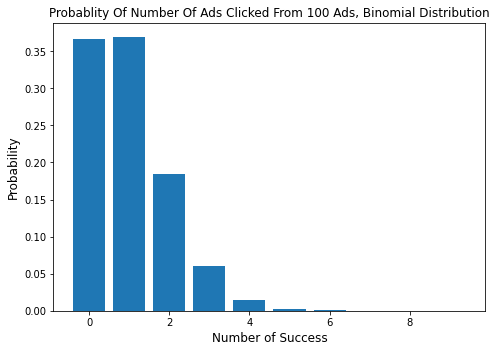

In [7]:
x = [i for i in range(0,10)]
y = p_success[0:10] # show only the first 10 of probablities

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Horizontal Bar Plot
ax.bar(x, y)

plt.title('Probablity Of Number Of Ads Clicked From 100 Ads, Binomial Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Number of Success', fontsize=12)

plt.show()

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">به این ترتیب توسط محاسبات توزیع binomial و نمودار بالا  توانستیم، درصد آگهی های کلیک شده نسبت به آگهی های load شده را به صورت احتمالی گزارش دهیم.
<div/>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">-	رتبه اولین کلیک کاربر:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">رتبه اولین کلیک کاربر را میتوان با حل این سوال معادلسازی کرد: <br>
احتمال اینکه کدام آگهی از بین آگهی های load شده کلیک شده است؟<br>
با توجه به اینکه احتمال هر بار کلیک کاربر مستقل از کلیک های قبلی است و احتمال کلیک شدن را p = 1/n در نظر گرفتیم به همین دلیل احتمال اینکه هر کدام از آگهی ها بعنوان اولین کلیک انتخاب شوند p = 1/n است. <br>
پس میتوان گفت، تخمین رتبه اولین کلیک کاربر برای n آگهی load شده از قرار زیر است: <br>
اینکه هر کدام از آگهی ها بعنوان اولین آگهی کاربر، کلیک شوند، احتمال p = 1/n دارند. پس هر کدام از آگهی ها  به احتمال p = 1/n میتوانند بعنوان رتبه اولین کلیک کاربر انتخاب شوند.

<div/>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">-	میانگین فاصله بین رتبه کلیک‌های یک کاربر:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
    برای محاسبه این متریک باید 2 پارامتر بصورت احتمالی تقریب زده شوند:<br>
1-	چند آگهی از بین آگهی های load شده کلیک شده است. <br>
2-	فاصله بین رتبه آگهی های کلیک شده چقدر است. <br>
پارامتر اول عینا در متریک " درصد آگهی‌های کلیک شده نسبت به آگهی های لود شده" توسط توزیع binomial محاسبه گردید. <br>
برای پارامتر دوم، باید برای هر تعداد آگهی ای که کلیک شده است، باید تخمینی از فاصله رتبه آگهی های کلیک شده را محاسبه کرد. <br>
برای مثال اگر دقیقا 2 آگهی کلیک شده باشند ما باید احتمال فاصله بین رتبه های این 2 آگهی را نیز محاسبه کنیم که در این صورت فاصله بین این 2 آگهی میتواند از 1 تا n-1 باشد. پس نیاز است که n-1 احتمال برای فاصله رتبه این 2 آگهی بدست آوریم سپس هر کدام از این احتمالات را با احتمال بدست آمده مربوط به پارامتر 1 ضرب کرده و در نهایت با هم جمع کنیم. <br>
و اینگونه میانگین فاصله رتبه 2 آگهی کلیک شده بصورت تخمینی محاسبه میشود. <br>
حال همین روش را باید برای تمام تعداد آگهی های کلیک شده محاسبه کرد. <br>

<div/>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">-	اینکه آیا روی یکی از ۳ نتیجه اول کوئری کلیک شده یا نه:
<div/>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
در اینجا کافیست  که حداقل روی یک آگهی  از 3 آگهی اول کلیک شده باشد، همچنین چون احتمال کلیک شدن در هر دفعه، مستقل از دفعات قبلی است و همچنین احتمال کلیک شدن هر آگهی را p=1/n در نظر گرفته ایم،<br>
در اینصورت اگر فرض کنیم تعداد آگهی های load  شده n = 100 است و 3 آگهی اول را با همدیگر مرج کنیم و انگار بجای 3 آگهی، آن ها را یک آگهی در نظر بگیریم، در اینصورت میتوان فرض کرد که 100 آگهی load شده تبدیل به n=100-3+1=98 آگهی شده اند،
و چونکه احتمال کلیک شدن هر آگهی را p=1/n در نظر گرفته ایم در اینصورت احتمال کلیک شدن یکی از 3  آگهی اول 
برابر با p= 1/n = 1/98 خواهد شد. 

</div>

#### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> پایان
<div/>

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"><strong> تسک ورودی سامر کمپ تحلیل داده دیوار</strong>
    <br><br>زینب محمدتبار
    <br>تابستان وبهار 1400<br>
</div>
<div class="alert alert-block alert-info" style="margin-top: 20px;direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
<li><a href="#ref4">نصب کتابخانه های پایتون</a></li>
    <p></p> 
<li><a href="#ref0"> سوال یک</a></li>
<li><a href="#ref1">سوال دو</a></li>
<li><a href="#ref2">سوال سه</a></li>
<li><a href="#ref3">سوال چهار</a></li>
<br>
</div>
<a href="https://github.com/mtzynb">گیت هاب من</a> - <a href="https://www.linkedin.com/in/zeynab-mohammadtabar/">صفحه لینکدین من </a>
</div>